In [151]:
import pandas as pd
import numpy as np
df = pd.read_csv('Country_data.csv')
df

,Country,Total in km2,Land in km2,Water in km2,Water %,HDI,%HDI Growth,IMF Forecast GDP(Nominal),World Bank Forecast GDP(Nominal),UN Forecast GDP(Nominal),IMF Forecast GDP(PPP),World Bank Forecast GDP(PPP),CIA Forecast GDP(PPP),Internet Users,UN Continental Region,UN Statistical Subregion,Population 2022,Population 2023,Population %Change
0,Russia,17098246.0,16378410.0,16378410.0,4.2,0.822,0.29,1862470.0,2240422.0,1778782.0,5056479.0,5326855.0,3875690.0,129800000.0,Europe,Eastern Europe,1.447133e+08,1.444444e+08,-0.19
1,Canada,9984670.0,9093507.0,9093507.0,8.9,0.936,0.25,2117805.0,2139840.0,1988336.0,2378973.0,2273489.0,1742790.0,33950632.0,Americas,Northern America,3.845433e+07,3.878129e+07,0.85
2,Brazil,8510346.0,8460415.0,8460415.0,0.6,0.754,0.38,2126809.0,1920096.0,1608981.0,4101022.0,3837261.0,2989430.0,165300000.0,Americas,South America,2.153135e+08,2.164224e+08,0.52
3,India,3287263.0,2973190.0,2973190.0,9.6,0.633,0.88,3732224.0,3385090.0,3201471.0,13119622.0,11874583.0,8443360.0,881250000.0,Asia,Southern Asia,1.417173e+09,1.428628e+09,0.81
4,Argentina,2796427.0,2736690.0,2736690.0,1.6,0.842,0.09,621833.0,632770.0,487227.0,1239515.0,1225435.0,893310.0,40024673.0,Americas,South America,4.551032e+07,4.577388e+07,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Saint Kitts and Nevis,261.0,261.0,261.0,0.0,0.777,0.21,1069.0,962.0,861.0,1760.0,1406.0,1240.0,44669.0,Americas,Caribbean,4.765800e+04,4.775500e+04,0.20
138,Marshall Islands,181.0,181.0,181.0,0.0,0.639,NaN,277.0,280.0,257.0,263.0,249.0,240.0,20560.0,Oceania,Micronesia,4.156900e+04,4.199600e+04,1.03
139,Liechtenstein,160.0,160.0,160.0,0.0,0.935,0.22,NaN,6608.0,NaN,NaN,4978.0,NaN,37201.0,Europe,Western Europe,3.932700e+04,3.958500e+04,0.66
140,San Marino,61.0,61.0,61.0,0.0,0.853,NaN,1998.0,NaN,2021.0,2872.0,2022.0,2060.0,20100.0,Europe,Southern Europe,3.366100e+04,3.364200e+04,-0.06


In [152]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [153]:
X = df['HDI'].values.reshape(-1, 1)
y = df['Population %Change'].values.reshape(-1, 1)

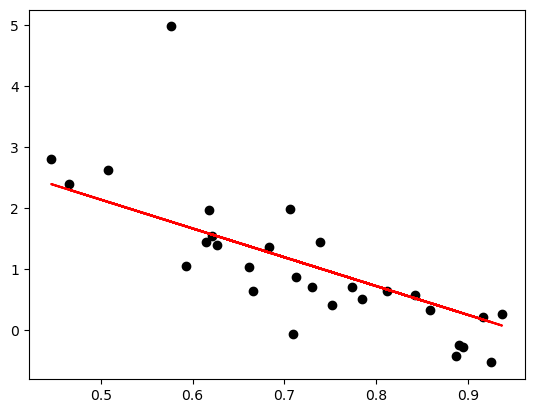

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='red')
plt.show()

In [155]:
r_squared_1 = model.score(X_test, y_test)
r_squared_1

0.5659050154786008

In [156]:
X = df[['Land in km2', 'Water in km2']].values
y = df['Total in km2'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

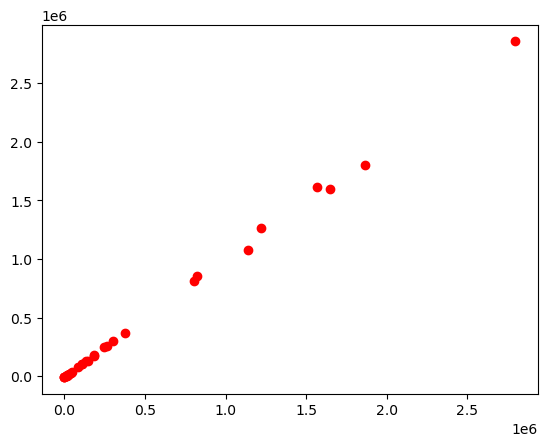

In [157]:
plt.scatter(y_test, y_pred, color="red")
plt.show()

In [158]:
r_squared_y = model.score(X_test, y_test)
r_squared_y

0.9985349558910448

In [159]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [160]:
X = df[['IMF Forecast GDP(Nominal)', 'World Bank Forecast GDP(Nominal)']].values
y = df['World Bank Forecast GDP(PPP)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

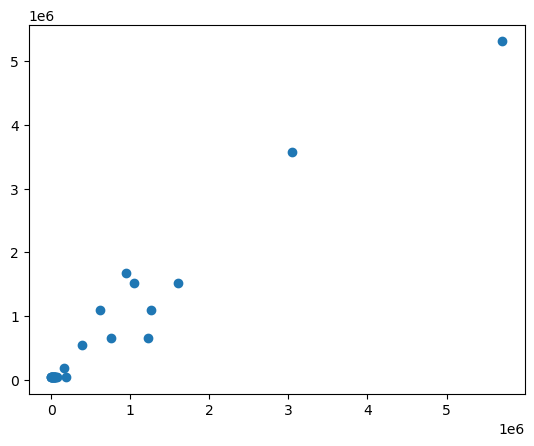

In [161]:
plt.scatter(y_test, y_pred)
plt.show()

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X = df[['IMF Forecast GDP(Nominal)', 'World Bank Forecast GDP(PPP)']].values
y = df['Internet Users'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [184]:
accuracy = accuracy_score(y_test, y_pred)